In [10]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "C:\\Windows\\Fonts\\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [11]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 읽기', encoding='cp949
gdf = gpd.read_file('BND_ADM_DONG_PG.shp')
data = pd.read_csv('24년도_예측결과xgb.csv', encoding='cp949')

In [12]:
gdf

,BASE_DATE,ADM_CD,ADM_NM,geometry
0,20240630,24010510,충장동,"POLYGON ((192642.941 284096.719, 192642.09 284..."
1,20240630,24010540,동명동,"POLYGON ((193270.372 284034.819, 193270.194 28..."
2,20240630,36680400,안좌면,"MULTIPOLYGON (((113338.23 243273.44, 113342.37..."
3,20240630,36680410,팔금면,"MULTIPOLYGON (((124370.24 249372.92, 124367.44..."
4,20240630,36680420,암태면,"MULTIPOLYGON (((124912 256632.46, 124912.4 256..."
...,...,...,...,...
3553,20240630,37070390,북안면,"POLYGON ((379872.409 374792.366, 379903.342 37..."
3554,20240630,37070400,대창면,"POLYGON ((371646.278 368632.128, 371661.744 36..."
3555,20240630,37100120,진량읍,"POLYGON ((366202.451 369552.681, 366359.735 36..."
3556,20240630,37100130,압량읍,"POLYGON ((360919.58 365420.343, 360932.357 365..."


In [13]:
# 2. 열 이름 변경
gdf = gdf.rename(columns={'ADM_CD': '행정코드', 'ADM_NM' : '읍면동'})

In [14]:
# 데이터 병합
gdf = gdf[gdf['행정코드'].str.startswith('21')].reset_index()

In [15]:
gdf['행정코드'] = gdf['행정코드'].astype('int')

In [16]:
df = gdf.merge(data[['행정코드', '예측 음주운전 적발 건수']], on='행정코드')

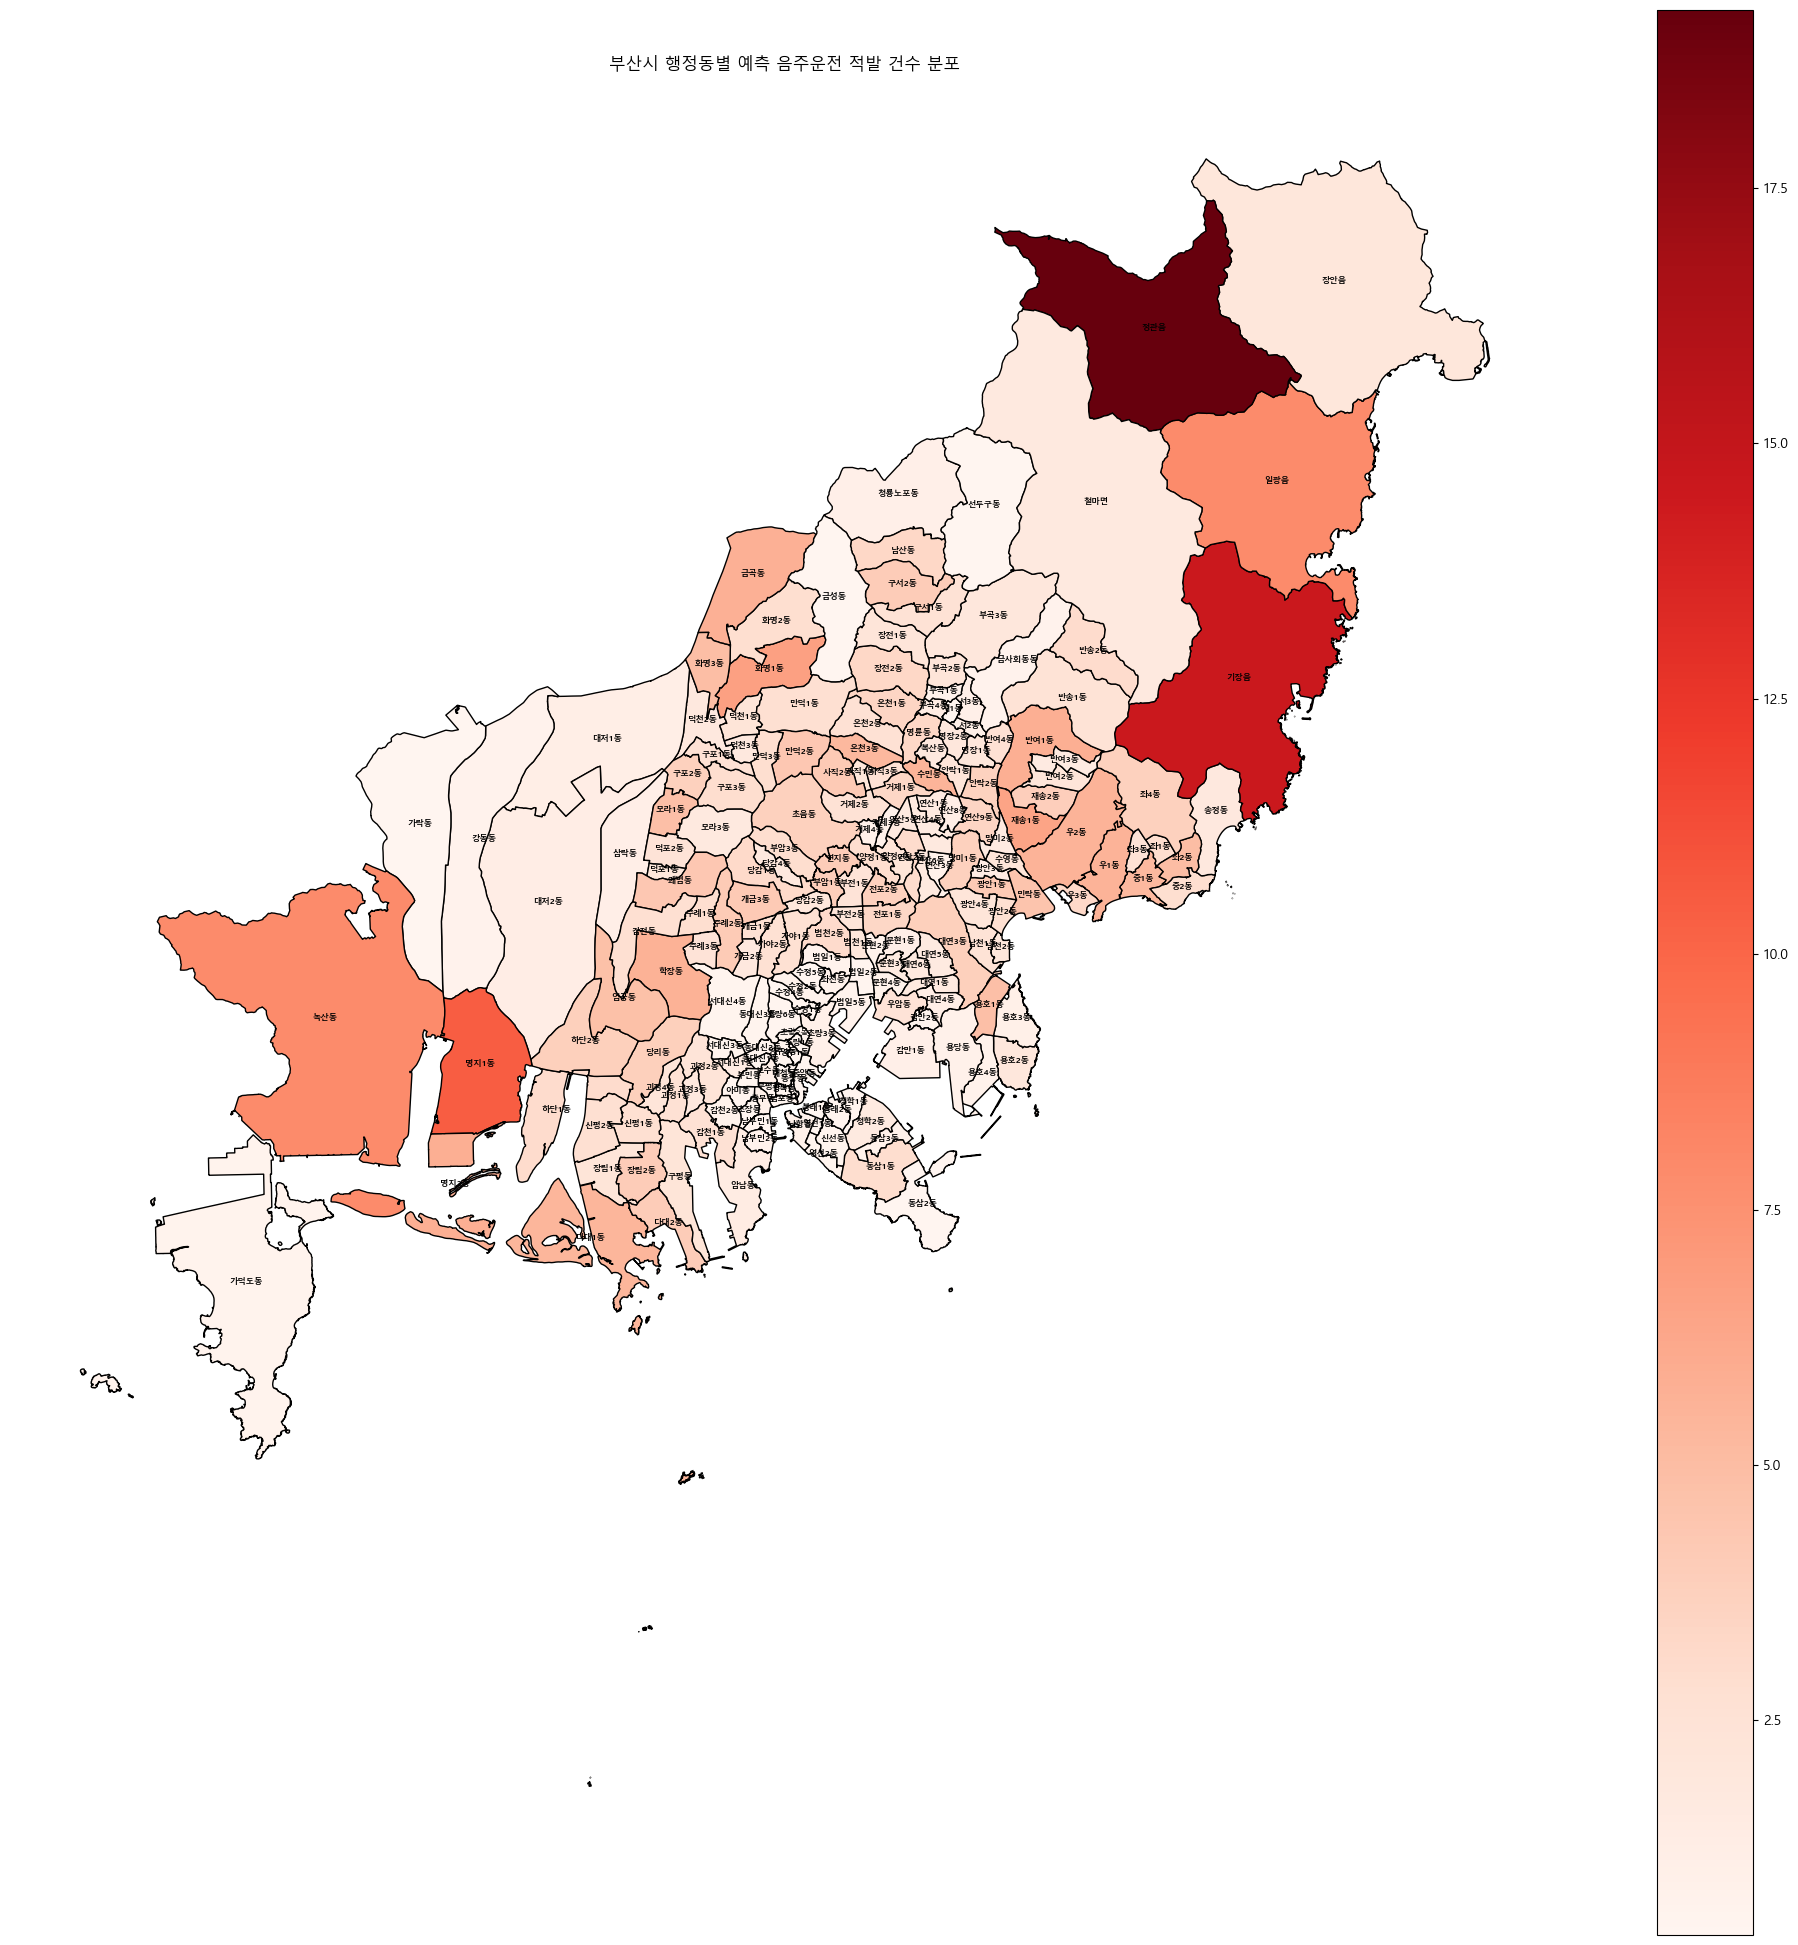

In [17]:
import matplotlib.pyplot as plt

# geometry 중심 좌표 계산 (읍면동 이름 표시를 위해)
df['center'] = df['geometry'].centroid  # 중심 좌표 추가

# 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(25, 25))
df.plot(column='예측 음주운전 적발 건수',  # 색상으로 나타낼 데이터 열
        cmap='Reds',  # 색상 팔레트
        legend=True,  # 범례 추가
        edgecolor='black',  # 경계선 색
        ax=ax)

# 읍면동 이름 추가
for idx, row in df.iterrows():
    # 중심 좌표에서 x, y 값 추출
    x, y = row['center'].x, row['center'].y
    # 읍면동 이름 표시
    plt.text(x, y, row['읍면동'], fontsize=6, ha='center', color='black')
    plt.rcParams['font.weight'] = 'bold'

# # 건수 추가
# df['예측 음주운전 적발 건수'] = df['예측 음주운전 적발 건수'].round(2)
# for idx, row in df.iterrows():
#     # 중심 좌표에서 x, y 값 추출
#     x, y = row['center'].x, row['center'].y
#     # 건수 표시
#     plt.text(x, y, row['예측 음주운전 적발 건수'], fontsize=12, ha='center', color='black')


# 제목 및 축 설정
ax.set_title("부산시 행정동별 예측 음주운전 적발 건수 분포", fontsize=12)
ax.axis('off')  # 축 제거

plt.savefig("output_map.png", dpi=300)